In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
train_df = pd.read_csv('C:/Users/vaish/Documents/train_1.csv').fillna(0)
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
train_df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,...,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05
mean,1.024882e+03,1.031234e+03,9.731234e+02,1.003791e+03,1.044342e+03,1.108086e+03,1.062624e+03,1.026181e+03,1.030808e+03,1.022828e+03,...,1.357067e+03,1.343449e+03,1.362474e+03,1.484413e+03,1.634242e+03,1.635483e+03,1.590915e+03,1.639885e+03,1.431160e+03,1.442972e+03
std,6.735340e+04,6.868551e+04,6.449417e+04,6.720994e+04,6.834087e+04,7.464303e+04,7.016081e+04,6.325117e+04,6.632223e+04,6.689720e+04,...,8.460264e+04,7.636701e+04,8.384845e+04,8.638560e+04,9.661396e+04,9.113984e+04,9.064050e+04,8.894637e+04,8.052685e+04,8.766977e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,...,1.800000e+01,1.900000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.000000e+01,1.900000e+01,1.800000e+01
50%,5.800000e+01,5.700000e+01,5.400000e+01,5.500000e+01,5.900000e+01,5.900000e+01,6.100000e+01,6.300000e+01,6.100000e+01,5.900000e+01,...,1.370000e+02,1.330000e+02,1.220000e+02,1.330000e+02,1.460000e+02,1.490000e+02,1.490000e+02,1.470000e+02,1.420000e+02,1.250000e+02
75%,4.090000e+02,4.060000e+02,3.980000e+02,3.880000e+02,4.280000e+02,4.340000e+02,4.310000e+02,4.360000e+02,4.350000e+02,4.300000e+02,...,5.850000e+02,5.770000e+02,5.510000e+02,6.040000e+02,6.340000e+02,6.450000e+02,6.300000e+02,6.260000e+02,6.120000e+02,5.420000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [5]:
train_df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145062,Francisco_el_matemático_(serie_de_televisión_d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group()[:2]     # result fo the match converted to a str obj
    return 'na'

In [7]:
train_df['language'] = train_df['Page'].map(get_language)
train_df['language'].head()

0    zh
1    zh
2    zh
3    zh
4    zh
Name: language, dtype: object

In [8]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


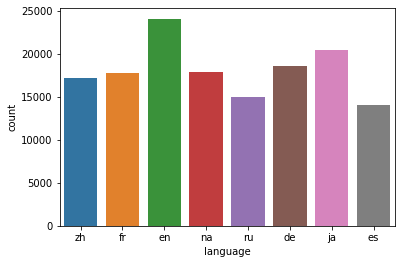

In [9]:
import seaborn as sb
sb.countplot(train_df['language'])
plt.show()

In [10]:
lang_sets = {}
lang_sets['en'] = train_df[train_df.language=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_df[train_df.language=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_df[train_df.language=='de'].iloc[:,0:-1]
lang_sets['na'] = train_df[train_df.language=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_df[train_df.language=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_df[train_df.language=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_df[train_df.language=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_df[train_df.language=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

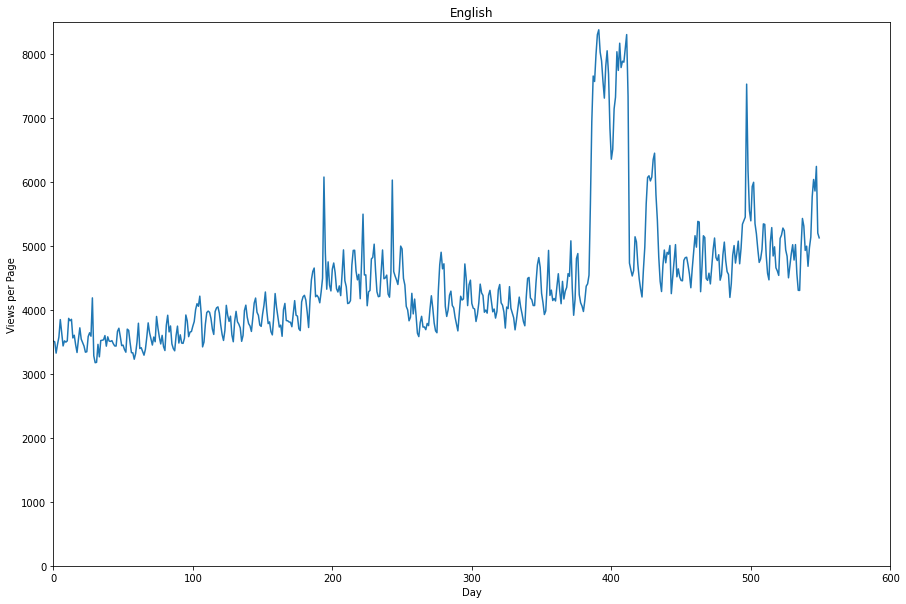

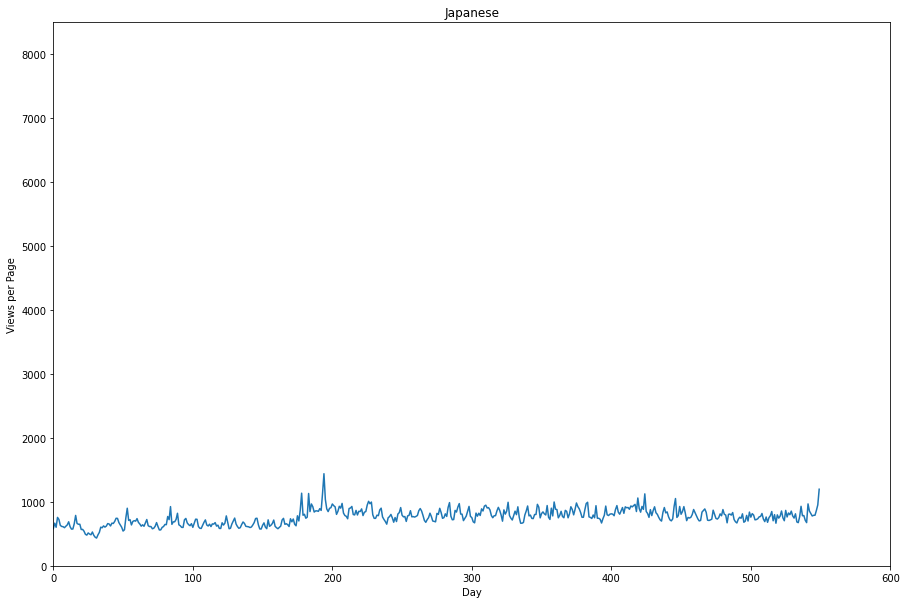

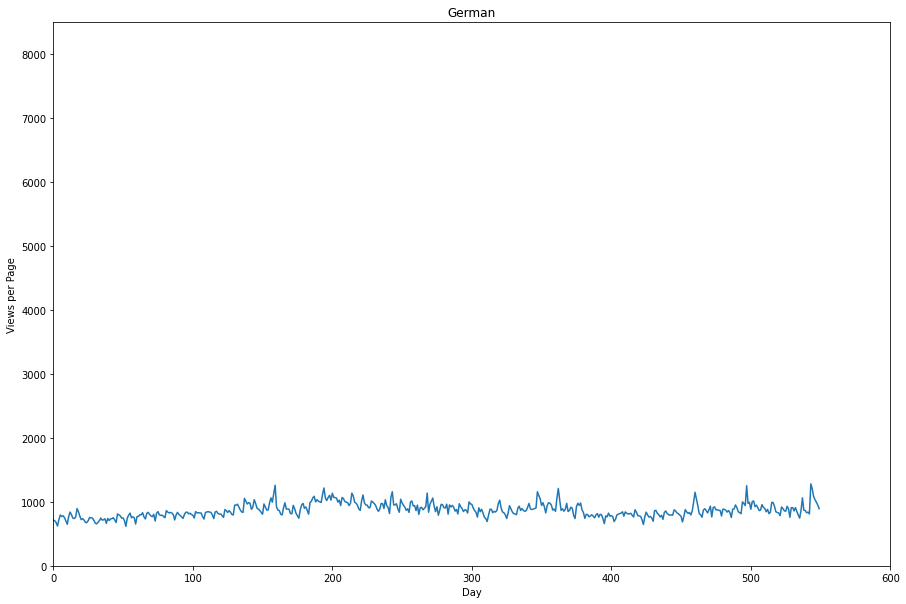

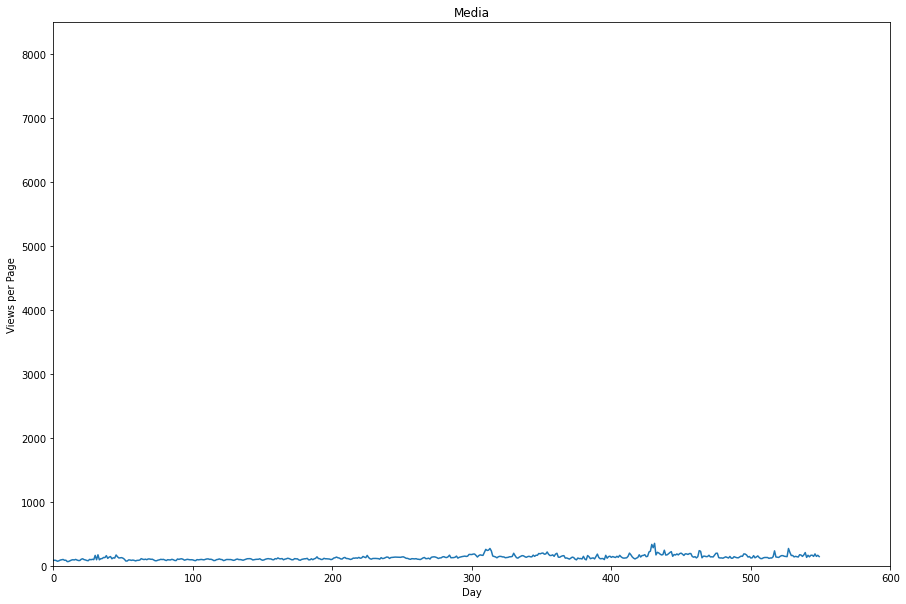

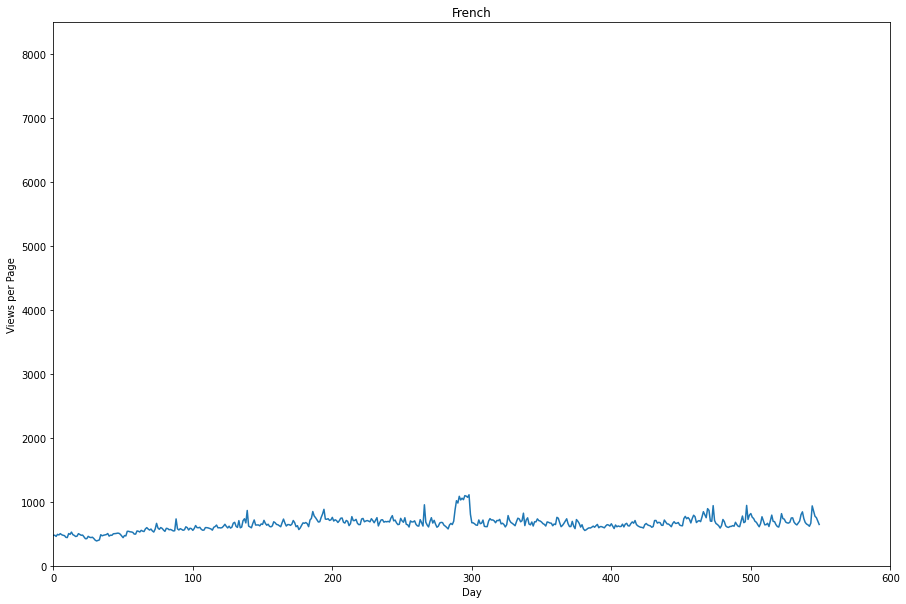

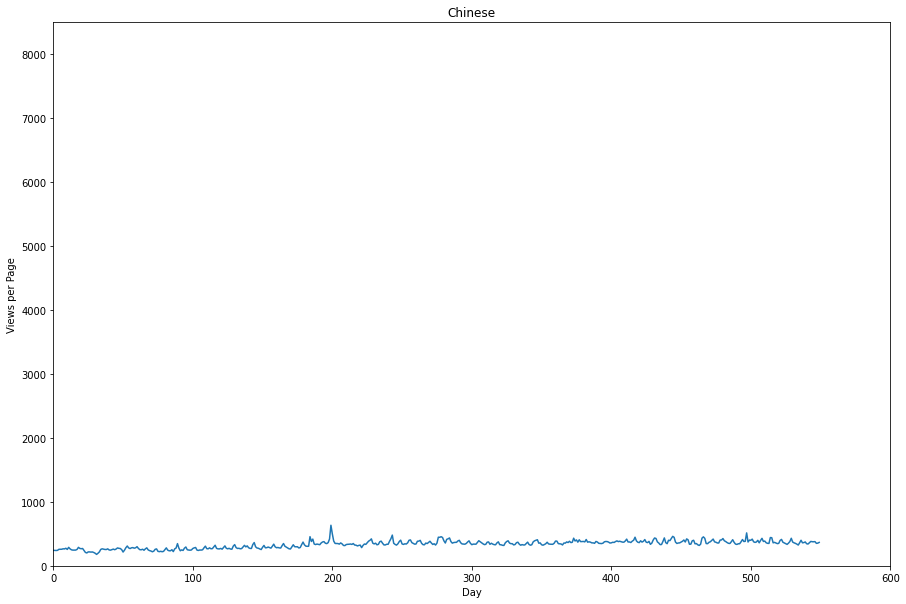

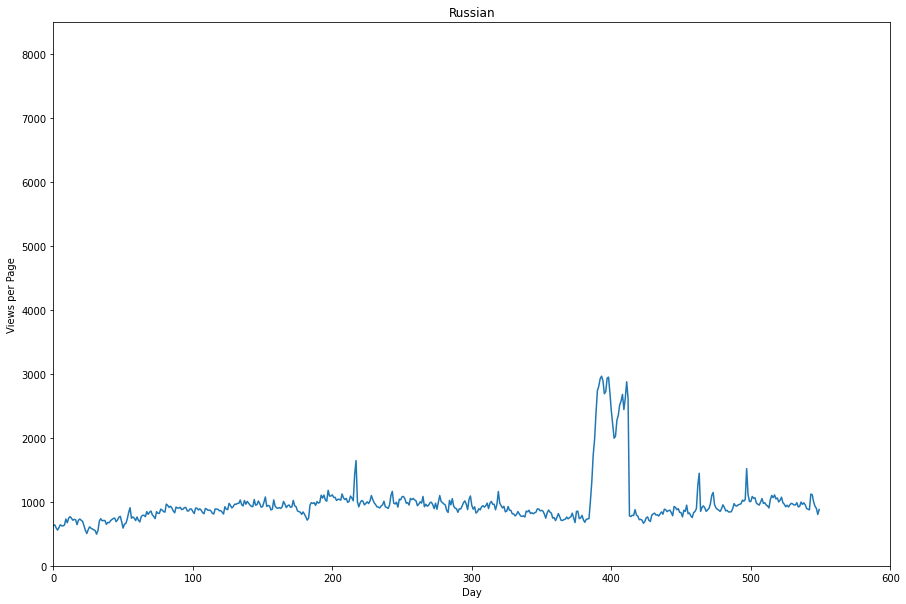

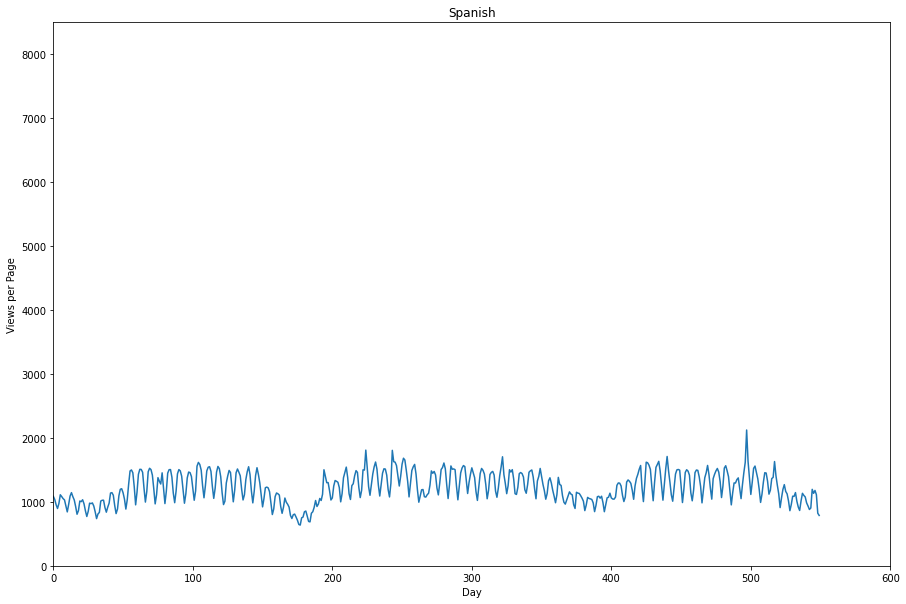

In [11]:
days = [ r for r in range(sums['en'].shape[0])]
def plot_with_fft(key):
    labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }
    fig = plt.figure(1,figsize=[15,10])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    plt.xlim(0,600)
    plt.ylim(0,8500)
    plt.show()
    
for key in sums:
    plot_with_fft(key)

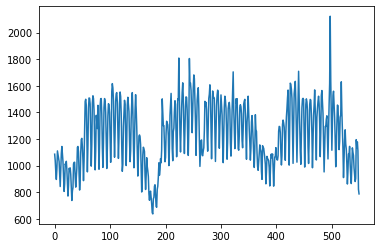

In [12]:
plt.plot(days,sums['es'])
plt.show()

In [13]:
pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(days,timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()


    #Plot rolling statistics:
    orig = plt.plot(days,timeseries, color='blue',label='Original')
    mean = plt.plot(days,rolmean, color='red', label='Rolling Mean')
    std = plt.plot(days,rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

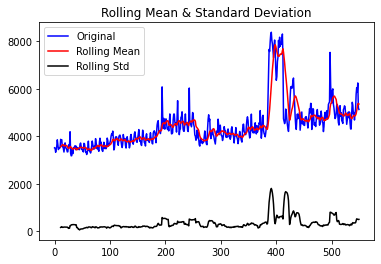

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [15]:
test_stationarity(days,sums['en'])


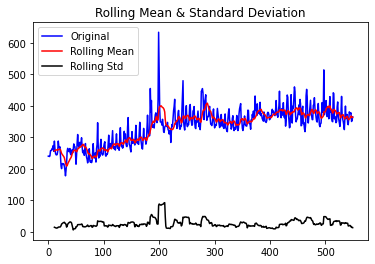

Results of Dickey-Fuller Test:
Test Statistic                  -1.668433
p-value                          0.447446
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


In [16]:
test_stationarity(days,sums['zh'])

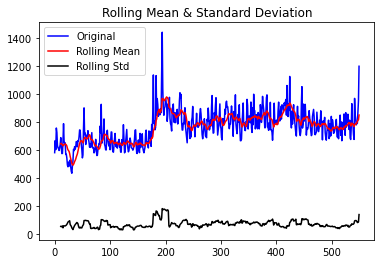

Results of Dickey-Fuller Test:
Test Statistic                  -2.555394
p-value                          0.102571
#Lags Used                       8.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64


In [17]:
test_stationarity(days,sums['ja'])

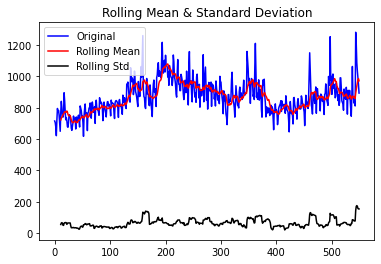

Results of Dickey-Fuller Test:
Test Statistic                  -2.402707
p-value                          0.140974
#Lags Used                      16.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


In [18]:
test_stationarity(days,sums['de'])

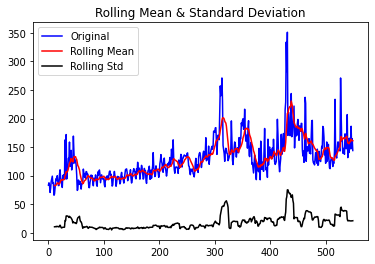

Results of Dickey-Fuller Test:
Test Statistic                  -3.269594
p-value                          0.016294
#Lags Used                       7.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618
dtype: float64


In [19]:
test_stationarity(days,sums['na'])

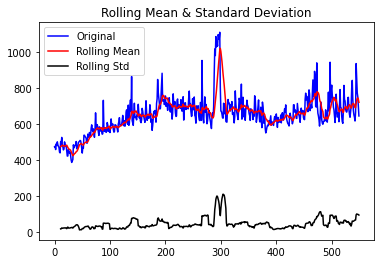

Results of Dickey-Fuller Test:
Test Statistic                  -2.849875
p-value                          0.051495
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.442609
Critical Value (5%)             -2.866947
Critical Value (10%)            -2.569650
dtype: float64


In [20]:
test_stationarity(days,sums['fr'])

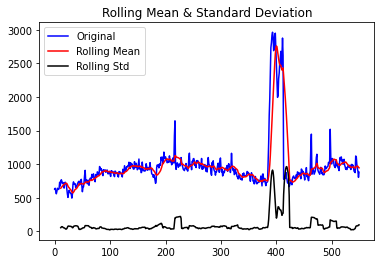

Results of Dickey-Fuller Test:
Test Statistic                  -3.924031
p-value                          0.001865
#Lags Used                       3.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.442384
Critical Value (5%)             -2.866848
Critical Value (10%)            -2.569597
dtype: float64


In [21]:
test_stationarity(days,sums['ru'])

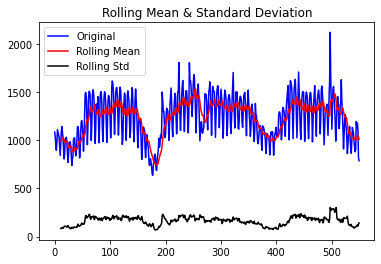

Results of Dickey-Fuller Test:
Test Statistic                  -3.014209
p-value                          0.033589
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64


In [22]:
test_stationarity(days,sums['es'])

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationaritt(days,timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(days,timeseries, color='blue',label='Original')
    mean = plt.plot(days,rolmean, color='red', label='Rolling Mean')
    std = plt.plot(days,rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [24]:
def test_stationarit(days,timeseries): 
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

2015-07-01    8.164471
2015-07-02    8.161236
2015-07-03    8.109333
2015-07-04    8.149617
2015-07-05    8.181866
                ...   
2016-12-27    8.706272
2016-12-28    8.675944
2016-12-29    8.739557
2016-12-30    8.556757
2016-12-31    8.542455
Length: 550, dtype: float64


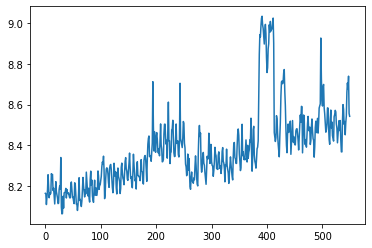

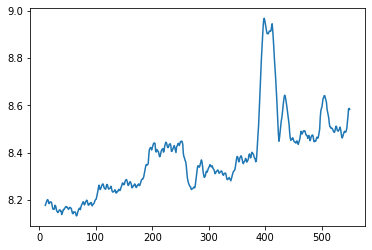

In [25]:
new_en=np.log(sums['en'])
print(new_en)
new_avg_en = new_en.rolling(12).mean()
plt.plot(days,new_en)
plt.show()
plt.plot(days,new_avg_en)
plt.show()

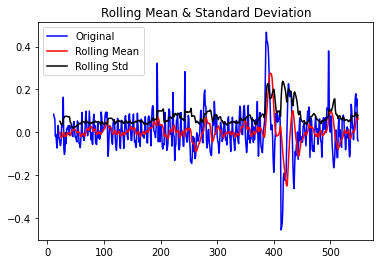

In [26]:
new_diff_en= new_en - new_avg_en
test_stationaritt(days,new_diff_en)

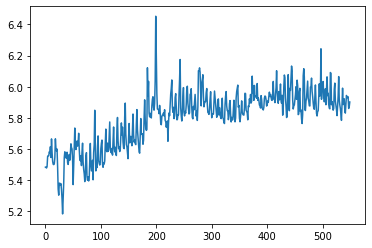

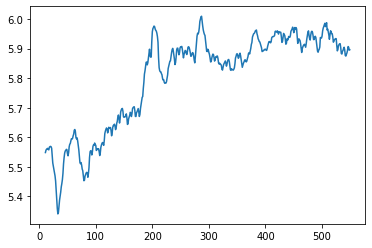

In [27]:
new_zh=np.log(sums['zh'])
new_avg_zh = new_zh.rolling(12).mean()
plt.plot(days,new_zh)
plt.show()
plt.plot(days,new_avg_zh)
plt.show()

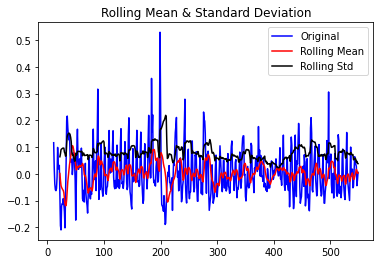

In [28]:
new_diff_zh= new_zh - new_avg_zh
test_stationaritt(days,new_diff_zh)

In [29]:
new_diff_zh= new_zh - new_avg_zh
new_diff_zh.dropna(inplace=True)
test_stationarit(days,new_diff_zh)

Results of Dickey-Fuller Test:
Test Statistic                -6.571825e+00
p-value                        7.901066e-09
#Lags Used                     1.900000e+01
Number of Observations Used    5.190000e+02
Critical Value (1%)           -3.443013e+00
Critical Value (5%)           -2.867125e+00
Critical Value (10%)          -2.569745e+00
dtype: float64


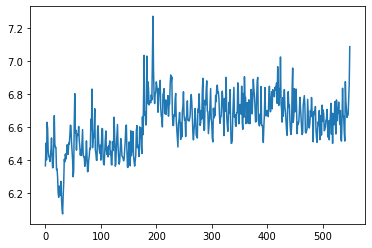

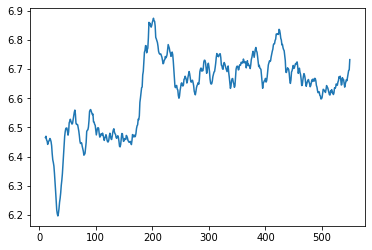

In [30]:
new_ja=np.log(sums['ja'])
new_avg_ja = new_ja.rolling(12).mean()
plt.plot(days,new_ja)
plt.show()
plt.plot(days,new_avg_ja)
plt.show()

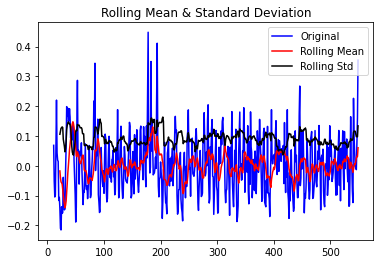

In [31]:
new_diff_ja= new_ja - new_avg_ja
test_stationaritt(days,new_diff_ja)

In [32]:
new_diff_ja= new_ja - new_avg_ja
new_diff_ja.dropna(inplace=True)
test_stationarit(days,new_diff_ja)

Results of Dickey-Fuller Test:
Test Statistic                -7.724776e+00
p-value                        1.166883e-11
#Lags Used                     9.000000e+00
Number of Observations Used    5.290000e+02
Critical Value (1%)           -3.442772e+00
Critical Value (5%)           -2.867019e+00
Critical Value (10%)          -2.569688e+00
dtype: float64


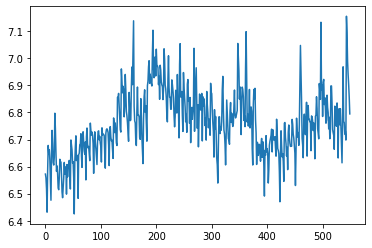

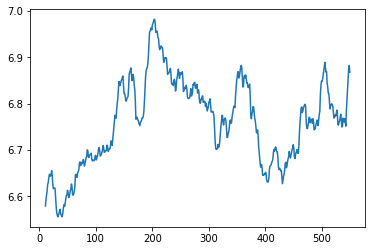

In [33]:
new_de=np.log(sums['de'])
new_avg_de = new_de.rolling(12).mean()
plt.plot(days,new_de)
plt.show()
plt.plot(days,new_avg_de)
plt.show()

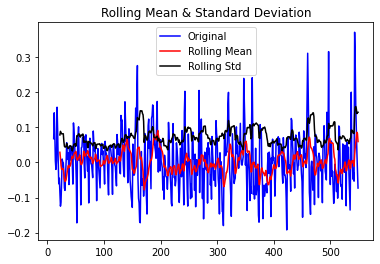

In [34]:
new_diff_de= new_de - new_avg_de
test_stationaritt(days,new_diff_de)

In [35]:
new_diff_de= new_de - new_avg_de
new_diff_de.dropna(inplace=True)
test_stationarit(days,new_diff_de)

Results of Dickey-Fuller Test:
Test Statistic                -5.915497e+00
p-value                        2.578695e-07
#Lags Used                     1.600000e+01
Number of Observations Used    5.220000e+02
Critical Value (1%)           -3.442940e+00
Critical Value (5%)           -2.867093e+00
Critical Value (10%)          -2.569727e+00
dtype: float64


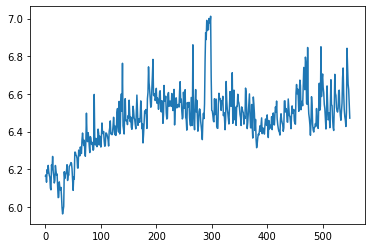

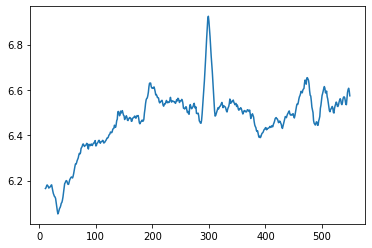

In [36]:
new_fr=np.log(sums['fr'])
new_avg_fr = new_fr.rolling(12).mean()
plt.plot(days,new_fr)
plt.show()
plt.plot(days,new_avg_fr)
plt.show()

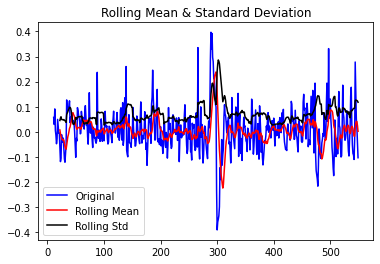

In [37]:
new_diff_fr= new_fr - new_avg_fr
test_stationaritt(days,new_diff_fr)

In [38]:
new_diff_fr= new_fr - new_avg_fr
new_diff_fr.dropna(inplace=True)
test_stationarit(days,new_diff_fr)

Results of Dickey-Fuller Test:
Test Statistic                -7.677013e+00
p-value                        1.539220e-11
#Lags Used                     1.500000e+01
Number of Observations Used    5.230000e+02
Critical Value (1%)           -3.442915e+00
Critical Value (5%)           -2.867082e+00
Critical Value (10%)          -2.569722e+00
dtype: float64


In [39]:
from statsmodels.tsa.stattools import acf, pacf

In [40]:
#lag_acf_en = acf(new_diff_en, nlags=20)
#lag_pacf_en = pacf(new_diff_en, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_en)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_en)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_en)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_en)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_en)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_en)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [41]:
lag_acf_zh = acf(new_diff_zh, nlags=20)
lag_pacf_zh = pacf(new_diff_zh, nlags=20, method='ols')

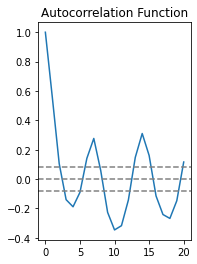

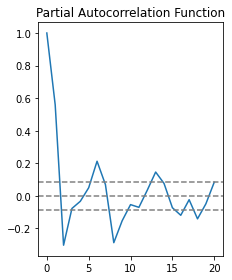

In [42]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_zh)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_zh)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_zh)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_zh)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_zh)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_zh)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [43]:
lag_acf_ja = acf(new_diff_ja, nlags=20)
lag_pacf_ja = pacf(new_diff_ja, nlags=20, method='ols')

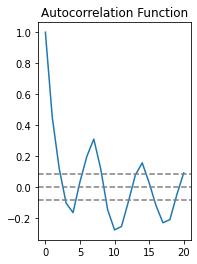

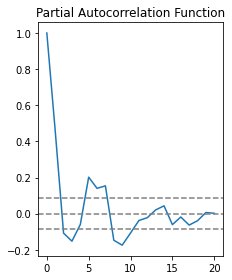

In [44]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_ja)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_ja)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_ja)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_ja)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_ja)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_ja)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [45]:
lag_acf_de = acf(new_diff_de, nlags=20)
lag_pacf_de = pacf(new_diff_de, nlags=20, method='ols')

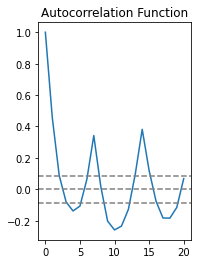

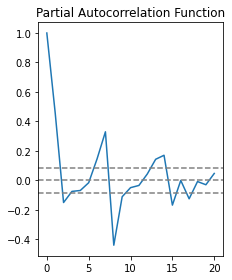

In [46]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_de)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_de)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_de)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_de)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_de)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_de)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [47]:
lag_acf_na = acf(sums['na'], nlags=20)
lag_pacf_na = pacf(sums['na'], nlags=20, method='ols')

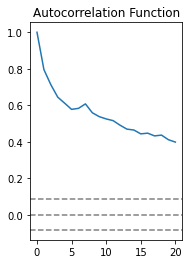

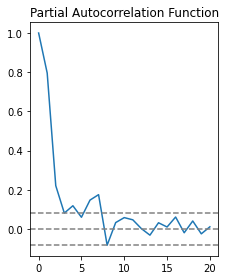

In [48]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_na)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['na'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['na'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_na)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['na'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['na'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [49]:
lag_acf_fr = acf(new_diff_fr, nlags=20)
lag_pacf_fr = pacf(new_diff_fr, nlags=20, method='ols')

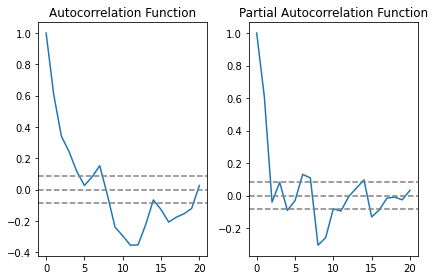

In [50]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_fr)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_fr)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_fr)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_fr)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_diff_fr)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_diff_fr)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [51]:
lag_acf_ru = acf(sums['ru'], nlags=20)
lag_pacf_ru = pacf(sums['ru'], nlags=20, method='ols')

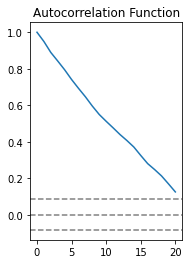

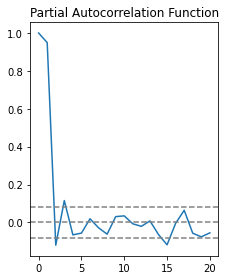

In [52]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_ru)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['ru'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['ru'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_ru)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['ru'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['ru'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [53]:
lag_acf_es = acf(sums['es'], nlags=20)
lag_pacf_es = pacf(sums['es'], nlags=20, method='ols')

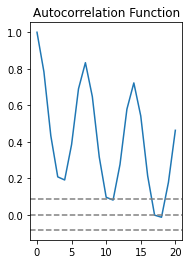

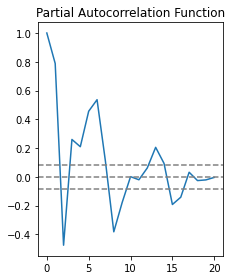

In [54]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf_es)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['es'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['es'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_es)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sums['es'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sums['es'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [67]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


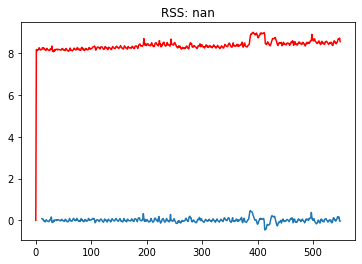

In [72]:
model=ARIMA(new_en, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(days,new_diff_en)
plt.plot(days,results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-new_diff_en)**2))
plt.show()


In [73]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

2015-07-01    0.000000
2015-07-02    8.164471
2015-07-03    8.161310
2015-07-04    8.110698
2015-07-05    8.150791
dtype: float64


In [74]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2015-07-01     0.000000
2015-07-02     8.164471
2015-07-03    16.325781
2015-07-04    24.436479
2015-07-05    32.587269
dtype: float64


In [88]:
# predictions_ARIMA_log = pd.Series(new_en.loc, index=new_en.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(
#     predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(new_en.iloc[0], index=new_en.index)
predictions_ARIMA_log =predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


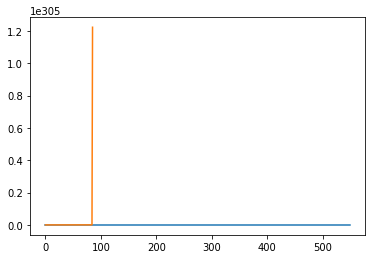

In [89]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(days,sums['en'])
plt.plot(days,predictions_ARIMA)
##plt.title('RMSE: %.4f'% np.sqrt(sums((predictions_ARIMA-sums['en'])**2)/len(sums['en'])))
plt.show()